<a href="https://colab.research.google.com/github/parthatom/CellClassific/blob/master/Copy_of_Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir test_images
!mkdir train_images


mkdir: cannot create directory ‘test_images’: File exists
mkdir: cannot create directory ‘train_images’: File exists


In [3]:
!unzip /content/drive/"My Drive"/dc99623a-c-vista_data
!unzip /content/test_final -d /content/test_images
!unzip /content/train_final -d /content/train_images


Archive:  /content/drive/My Drive/dc99623a-c-vista_data.zip
replace sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test_final.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train_final.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /content/test_final.zip
replace /content/test_images/f1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/train_final.zip
replace /content/train_images/f1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
import sys
import math
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from pathlib import Path
import PIL
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.optim as optim
input_path = Path("/content/")
%matplotlib inline
import argparse
import shutil
import time
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
plt.ion()   # interactive mode

In [0]:
root = input_path
df_train = pd.read_csv( input_path / 'train.csv')
train_image_path = input_path / "train_images"
test_image_path = input_path / "test_images"
label= df_train.id.values  

In [0]:

!mkdir train_final  

!mkdir train_final/1
!mkdir train_final/2
!mkdir train_final/3
!mkdir train_final/4
!mkdir train_final/5
!mkdir train_final/6
!mkdir train_final/7
!mkdir train_final/8
!mkdir train_final/9
!mkdir train_final/10
!mkdir train_final/11
!mkdir train_final/12
!mkdir train_final/13
!mkdir train_final/14

In [0]:
train_final_path = input_path / "train_final"
train_dir = train_image_path 


In [0]:
folders = os.listdir(root)
from pathlib import Path

In [0]:
for i in range (0,10600):
    filename = Path(df_train.id.values[i])
    lol=str(df_train.label.values[i])
    classname =Path(lol)
    src_path = train_image_path / filename
    dst_path = train_final_path / classname / filename 
    shutil.copy(src_path, dst_path)

In [0]:
class imageload(Dataset):
  def __init__(self,root):
    self.Images = []
    folders = os.listdir(root)
    folder= folders[1]
    folder_path = os.path.join(root,folder)
    for img_class in os.listdir(folder_path):
      class_path = os.path.join(folder_path, img_class)
      for ims in os.listdir(class_path):
        print(ims, class_path)
        img_path = os.path.join(class_path,ims)
        print(img_path)
        I = plt.imread(img_path)
        self.Images.append(I)
    data = [(x,y) for x,y in zip (self.Images,label)] 
    self.data = data
  def __len__ (self):
    return len(self.data)
  def __getitem__(self,index):
    img = self.data[index][0]
    img_tensor = torch.tensor(np.asarray(img, dtype = np.float32))
    label = self.data[index][1]
    return (img_tensor, label)
    

In [0]:
train_dir = train_image_path 
train_final_path = input_path / "train_final"


In [0]:
for i in range (0,10600):
    filename = Path(df_train.id.values[i])
    lol=str(df_train.label.values[i])
    classname =Path(lol)
    src_path = train_image_path / filename
    dst_path = train_final_path / classname / filename 
    shutil.copy(src_path, dst_path)

In [116]:
train_dataset = imageload(os.path.join(root, ""))

f6434.png /content/train_final/14
/content/train_final/14/f6434.png
f8212.png /content/train_final/14
/content/train_final/14/f8212.png
f7742.png /content/train_final/14
/content/train_final/14/f7742.png
f2343.png /content/train_final/14
/content/train_final/14/f2343.png
f5636.png /content/train_final/14
/content/train_final/14/f5636.png
f6611.png /content/train_final/14
/content/train_final/14/f6611.png
f5730.png /content/train_final/14
/content/train_final/14/f5730.png
f1692.png /content/train_final/14
/content/train_final/14/f1692.png
f1987.png /content/train_final/14
/content/train_final/14/f1987.png
f4697.png /content/train_final/14
/content/train_final/14/f4697.png
f1724.png /content/train_final/14
/content/train_final/14/f1724.png
f2914.png /content/train_final/14
/content/train_final/14/f2914.png
f487.png /content/train_final/14
/content/train_final/14/f487.png
f1915.png /content/train_final/14
/content/train_final/14/f1915.png
f3540.png /content/train_final/14
/content/train_f

In [0]:
import torch.nn as nn
import torch
import torch.nn.functional as F 

class Model(torch.nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320,50)
    self.fc2 = nn.Linear(50,14)
  def forward(self,x):
              x = F.relu(F.max_pool2d(self.conv1(x), 2))
              x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
              x=x.view(-1,320)
              x=F.relu(self.fc1(x))
              x.F.dropout(x)
              x=self.fc2(x)
              return x
		# Reshaping the tensor to BATCH_SIZE x 320. Torch infers this from other dimensions when one of the parameter is -1.

In [0]:
MODEL_NAME = 'conv2_layer_28x28'
BATCH_SIZE = 256
N_EPOCHS = 50

In [0]:
net = Model()

In [0]:
loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)

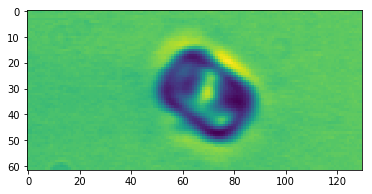

In [131]:
%matplotlib inline
image, label = next(iter(loader))
trans = transforms.ToPILImage()
img = trans(image)
#print(image.shape)
plt.imshow(img)

In [109]:
image.shape

torch.Size([1, 62, 130])